# Dimension Reduction
This notebook will contain implementation of two clustering, and four dimensionality (3 linear, and one non-linear) algorithms.

Clustering:
- Expectation Maximization
- Clustering Algorithm of Your Choice

Dimensionality (Linear)
- PCA
- ICA
- Randomized Projections

Dimensionality (Non-Linear)
- Manifold Learning Algorithm of Your Choice


## Step 1: Obtaining and Cleaning the Chess data
Based on which dataset to run - only run one of these not both.


### Using the Chess Dataset

Number of entries: 18132
Number of features: 6
   turns  white_rating  black_rating  rated winner  first_move_Nc3  \
1     16          1322          1261   True  black           False   
2     61          1496          1500   True  white           False   
3     61          1439          1454   True  white           False   
4     95          1523          1469   True  white           False   
6     33          1520          1423   True  white           False   
8     66          1439          1392   True  black           False   
9    119          1381          1209   True  white           False   

   first_move_Nf3  first_move_Nh3  first_move_a3  first_move_a4  ...  \
1           False           False          False          False  ...   
2           False           False          False          False  ...   
3           False           False          False          False  ...   
4           False           False          False          False  ...   
6           False           Fals

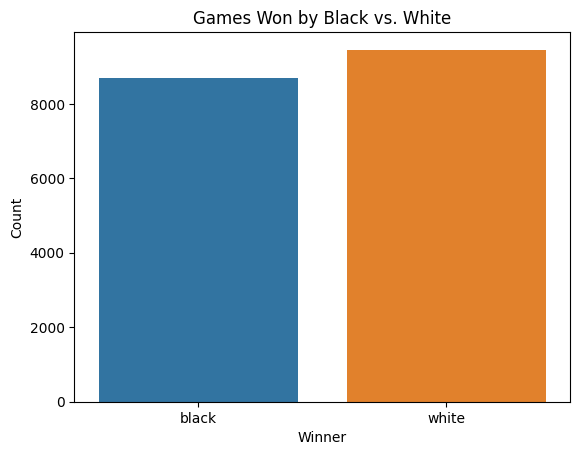

In [47]:

import warnings
from sklearn.preprocessing import StandardScaler
import numpy as np
from data import get_chess_data
warnings.simplefilter(action='ignore', category=FutureWarning)

# Constants
np.random.seed(26)

#run chess
dataset = "Chess"
X_train, X_test, y_train, y_test = get_chess_data()


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("number of dimensions", X_train_scaled.shape)
print("columns", X_train.columns)

### Using the Bank Dataset

Number of entries: 10127
Number of features: 5
Number of features after one-hot encoding: 16
Number of features after oversampling: 16


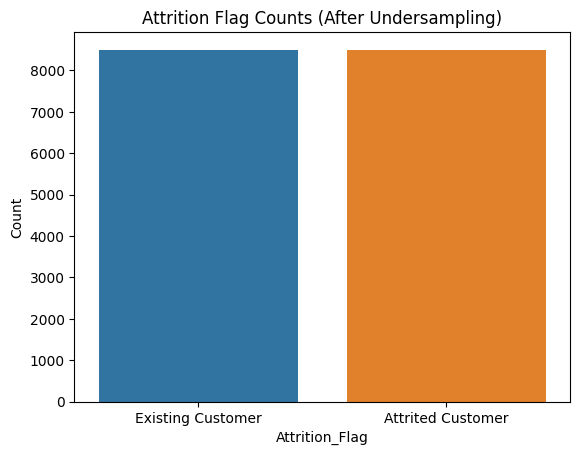

Attrition_Flag
Existing Customer    8500
Attrited Customer    8500
Name: count, dtype: int64
Number of features in training data: 16
columns Index(['Customer_Age', 'Gender_M', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown'],
      dtype='object')


In [45]:
import warnings
from sklearn.preprocessing import StandardScaler
import numpy as np
from data import get_bank_dataset
warnings.simplefilter(action='ignore', category=FutureWarning)

# Constants
np.random.seed(26)

dataset = "Bank Churners"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = get_bank_dataset()
print("Number of features in training data:", X_train.shape[1])

# We need to scale the data before we pass it to the SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("columns", X_train.columns)

## Step 2: Running Clustering Algorithms on Dataset
2 clustering algorithms: Expectation Maximization(EM) and KMeans

### Algorithm 1: Expectation Maximization (EM)

n: 2, score: -4404.756536648617
n: 3, score: -249772.94939338425
n: 4, score: -226964.6517949657
n: 5, score: -542286.4882500157
n: 6, score: -592669.469483315
n: 7, score: -742186.2437757181
n: 8, score: -804894.1926305571
n: 9, score: -917684.1182274541
n: 10, score: -943590.7740218446
n: 11, score: -993478.2118745822
n: 12, score: -1103943.4437382603
n: 13, score: -1114306.5155318833
n: 14, score: -1139404.949020141
n: 15, score: -1198409.3988169937


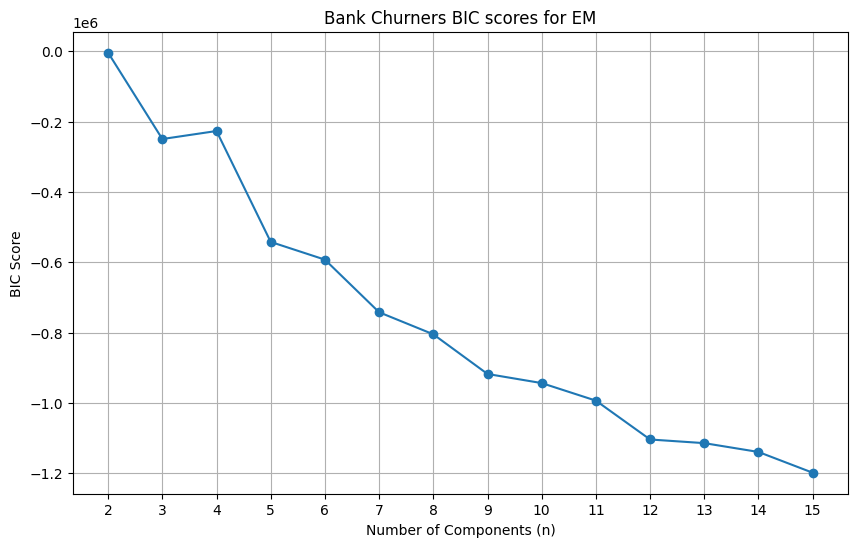

In [2]:
# Get BIC Scores to determine which n_components to use
import numpy as np
from algorithms import run_gmm, plot_clustering
import matplotlib.pyplot as plt

Bic_scores = []

for n in range(2, len(X_train_scaled[0])):
    title = f"{dataset} GMM Clustering with {n} components"
    gmm, gmm_labels = run_gmm(X_train_scaled, n)
    bic_score = gmm.bic(X_train_scaled)
    Bic_scores.append({"components": n, "score": bic_score})

for bic_dict in Bic_scores:
    print(f"n: {bic_dict['components']}, score: {bic_dict['score']}")

n_clusters = [d['components'] for d in Bic_scores]
scores = [d['score'] for d in Bic_scores]

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, scores, marker='o')

# Annotating the plot
plt.title(f'{dataset} BIC scores for EM')
plt.xlabel('Number of Components (n)')
plt.ylabel('BIC Score')
plt.xticks(n_clusters)
plt.grid(True)

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


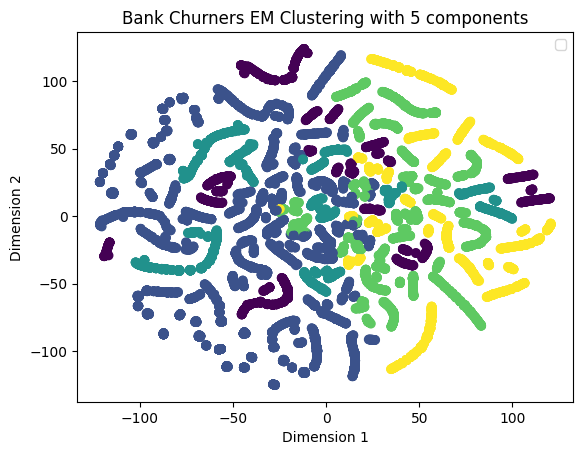

In [6]:
import numpy as np
from algorithms import run_gmm, plot_clustering

n = 5  # set n_components here from previous step 

title = f"{dataset} EM Clustering with {n} components"
gmm, gmm_labels = run_gmm(X_train_scaled, n)
plot_clustering(X_train_scaled, gmm_labels, title=title, tsne_components=2)



### Algorithm 2: K-Means Clustering

Running evaluations for n_components

n: 5, SSD score: 145025.86498318
n: 6, SSD score: 135450.61089640274
n: 7, SSD score: 127115.25105143483
n: 8, SSD score: 119418.33550435648
n: 9, SSD score: 112753.15120703443
n: 10, SSD score: 103465.34215871358
n: 11, SSD score: 99209.57005660533
n: 12, SSD score: 94328.27910139406
n: 13, SSD score: 91891.36364174231
n: 14, SSD score: 87798.99580340667
n: 15, SSD score: 86289.09444067103
n: 5, silhouette score: 0.22284139145758913
n: 6, silhouette score: 0.23269385203733275
n: 7, silhouette score: 0.20014038220858768
n: 8, silhouette score: 0.23331265760031084
n: 9, silhouette score: 0.20476569948641538
n: 10, silhouette score: 0.2319715167985098
n: 11, silhouette score: 0.22794665155354418
n: 12, silhouette score: 0.23737149059284524
n: 13, silhouette score: 0.23173164116901784
n: 14, silhouette score: 0.2371466040336115
n: 15, silhouette score: 0.23781586104835342


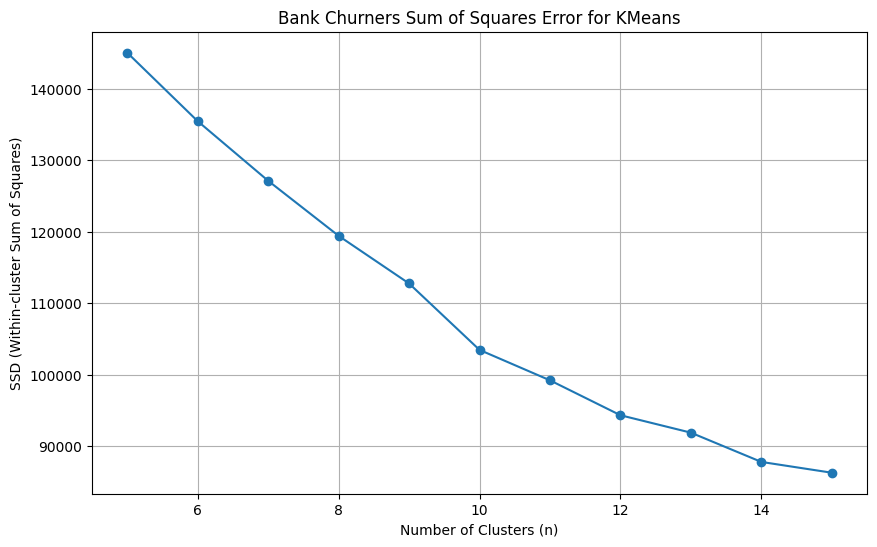

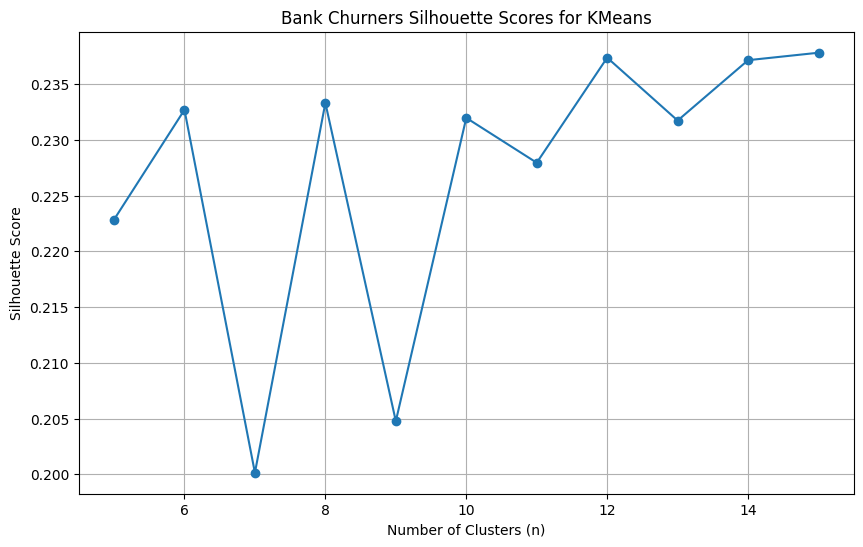

In [4]:
from sklearn.metrics import silhouette_score
from algorithms import run_kmeans, plot_clustering
ssd = []
silhouette_scores = []

for n_clusters in range(5,len(X_train_scaled[0])):
    # title = f"{dataset} KMeans Clustering with {n_clusters} clusters"
    kmeans, kmeans_labels = run_kmeans(X_train_scaled, n_clusters)
    
    # Calculate SSD for the elbow method
    ssd.append({"clusters": n_clusters, "score": kmeans.inertia_})
    
    # Calculate silhouette score for each k
    silhouette_avg = silhouette_score(X_train_scaled, kmeans_labels)
    silhouette_scores.append({"clusters": n_clusters, "silhouette_score": silhouette_avg})
    
    # plot_clustering(X_train_scaled, kmeans_labels, kmeans.cluster_centers_, title, tsne_components=3)

# Print SSD scores
for dic in ssd:
    print(f"n: {dic['clusters']}, SSD score: {dic['score']}")

# Print silhouette scores
for dic in silhouette_scores:
    print(f"n: {dic['clusters']}, silhouette score: {dic['silhouette_score']}")

# Plot SSD scores
plt.figure(figsize=(10, 6))
plt.plot([d['clusters'] for d in ssd], [d['score'] for d in ssd], marker='o')
plt.title(f'{dataset} Sum of Squares Error for KMeans')
plt.xlabel('Number of Clusters (n)')
plt.ylabel('SSD (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot([d['clusters'] for d in silhouette_scores], [d['silhouette_score'] for d in silhouette_scores], marker='o')
plt.title(f'{dataset} Silhouette Scores for KMeans')
plt.xlabel('Number of Clusters (n)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Running kMeans on ideal candidate for n_Components

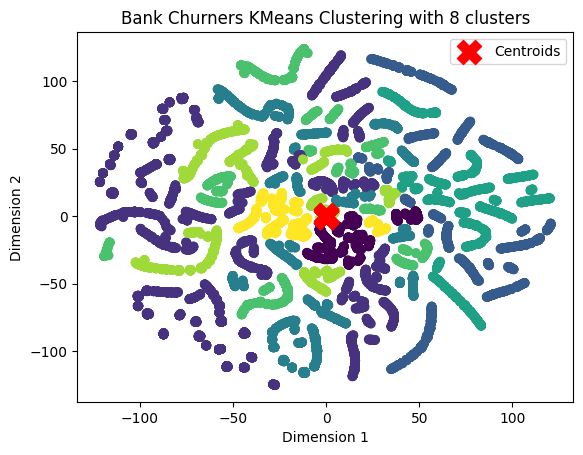

In [5]:
n_clusters = 8
title = f"{dataset} KMeans Clustering with {n_clusters} clusters"
kmeans, kmeans_labels = run_kmeans(X_train_scaled, n_clusters)
plot_clustering(X_train_scaled, kmeans_labels, kmeans.cluster_centers_, title, tsne_components=2)


## 3: Dimension Reduction Algorithms 
4 Reduction algorithms below

(Linear)
- PCA
- ICA
- Randomized Projections

(Non-Linear)
- Manifold Learning Algorithm of Your Choice

### Algorithm 3: PCA

Use the Eigen values to evaluate the best value for n_components to use:

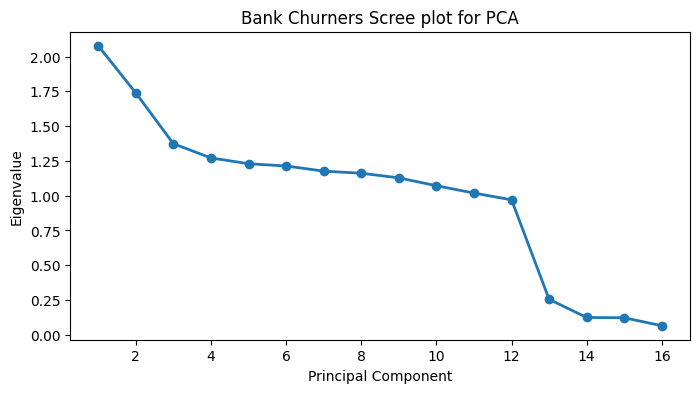

In [7]:
from algorithms import plot_eigenvalues

title = f"{dataset} Scree plot for PCA"
plot_eigenvalues(X_train_scaled, title)

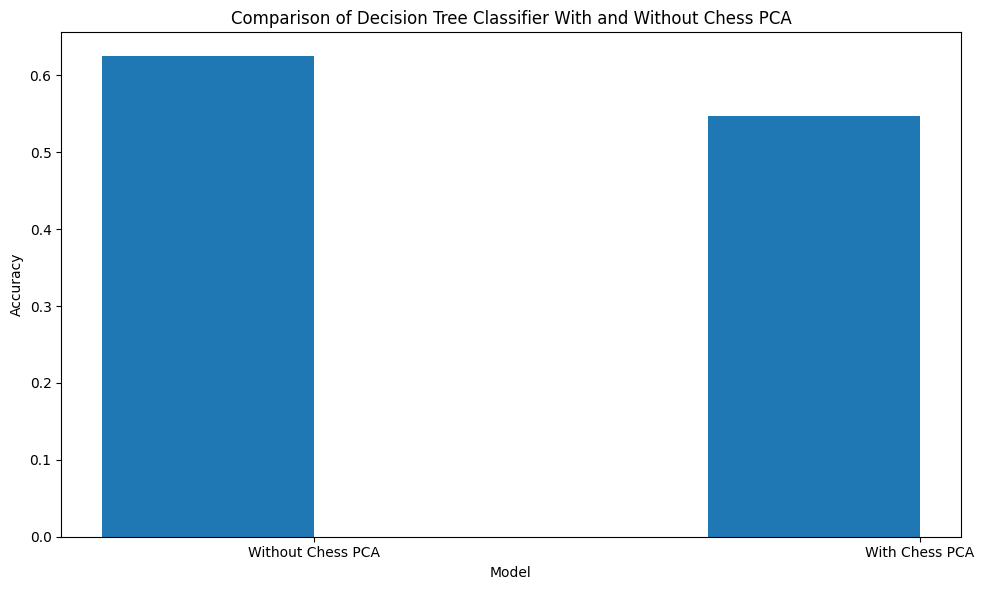

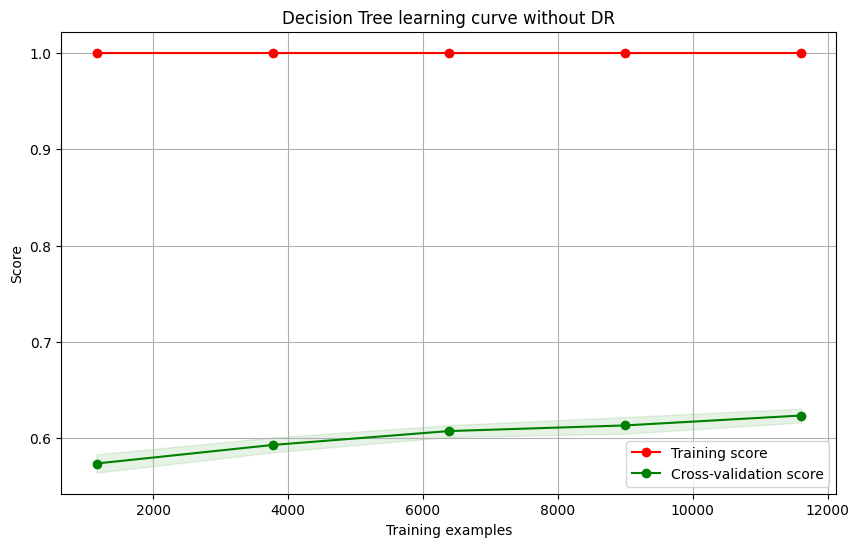

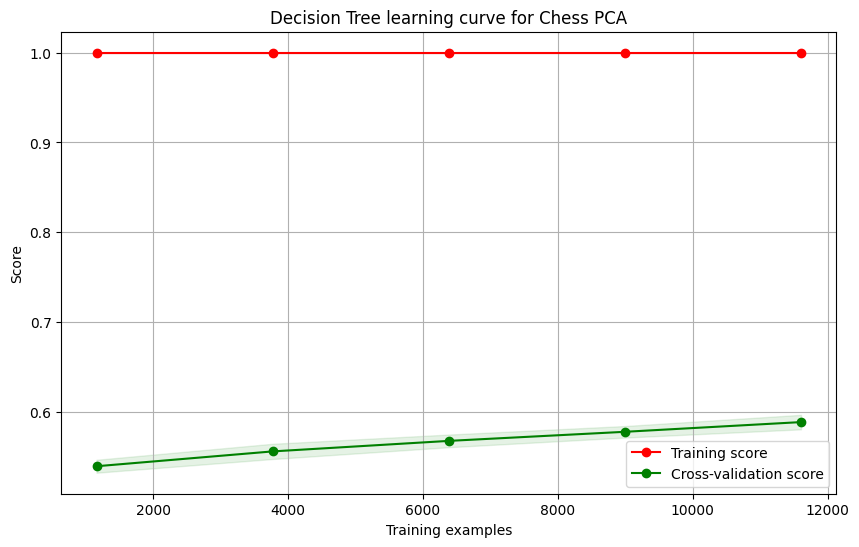

accuracies 0.6247587537910119 0.5467328370554178


In [43]:
from dt_classifier import compare_dimensionality_reduction, compare_dimensionality_reduction_lc
from sklearn.decomposition import PCA

n_components= 5
# Run with PCA
pca = PCA(n_components=n_components, random_state=26)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
acc_without_dr, acc_with_dr = compare_dimensionality_reduction(X_train_scaled, X_test_scaled, y_train, y_test, X_train_pca, X_test_pca, f"{dataset} PCA")
compare_dimensionality_reduction_lc(X_train_scaled, X_test_scaled, y_train, y_test, X_train_pca, X_test_pca, f"{dataset} PCA")

print('accuracies', acc_without_dr, acc_with_dr)


For n=1 components, total variance explained: 8.17%
For n=2 components, total variance explained: 15.19%
For n=3 components, total variance explained: 19.78%
For n=4 components, total variance explained: 24.66%
For n=5 components, total variance explained: 29.03%
For n=6 components, total variance explained: 33.60%
For n=7 components, total variance explained: 37.96%
For n=8 components, total variance explained: 42.47%
For n=9 components, total variance explained: 46.90%
For n=10 components, total variance explained: 51.27%
For n=11 components, total variance explained: 55.67%
For n=12 components, total variance explained: 60.04%
For n=13 components, total variance explained: 64.41%
For n=14 components, total variance explained: 68.76%
For n=15 components, total variance explained: 73.12%
For n=16 components, total variance explained: 77.47%
For n=17 components, total variance explained: 81.82%
For n=18 components, total variance explained: 86.17%
For n=19 components, total variance ex

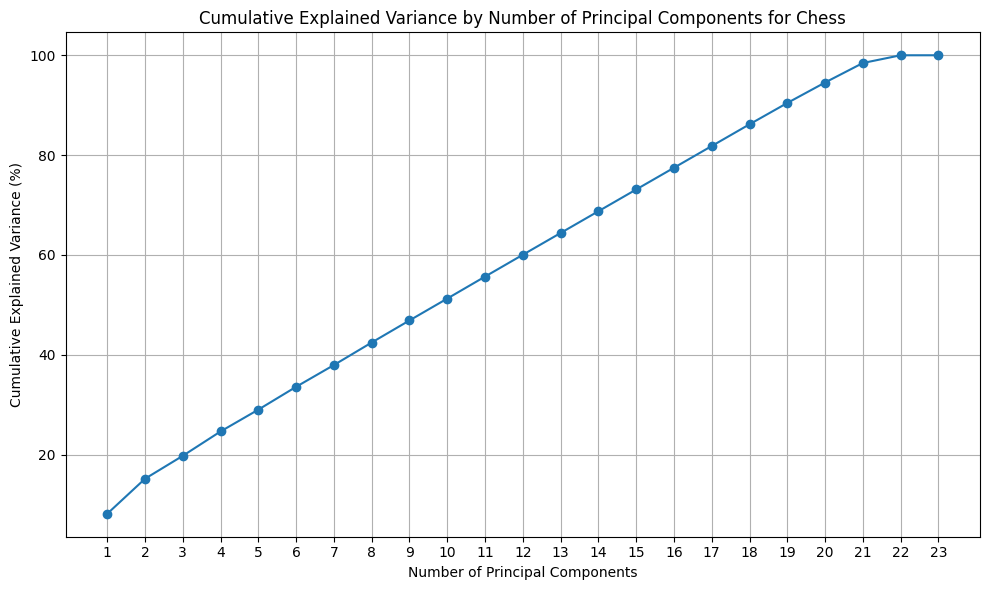

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train_scaled is already defined and scaled appropriately

# List to hold the cumulative variance
cumulative_variance = []
max_features = 23
r = range(1, max_features+1)
# Loop over the range of number of components
for n in r:  # start from 1 because PCA with 0 components doesn't make sense
    pca = PCA(n_components=n, random_state=26)
    pca.fit(X_train_scaled)
    explained_variance = pca.explained_variance_ratio_.sum() * 100  # Variance explained in percentage
    cumulative_variance.append(explained_variance)
    print(f"For n={n} components, total variance explained: {explained_variance:.2f}%")

# Plotting the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(r, cumulative_variance, marker='o')
plt.title(f'Cumulative Explained Variance by Number of Principal Components for {dataset}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xticks(r)  # to show all integer values on x-axis
plt.grid(True)
plt.tight_layout()
plt.show()


### Algorithm 4: ICA

Get the best n_components by using kurtosis

kurtosis scores [1.5719156043155194, 1.6961929067848724, 1.4804187644114688, 1.424487190312022, 1.1796348801610694, 0.9721174958620781, 1.2214017659833876, 1.3496076085727933, 1.9265252449609298, 2.2519872560177703, 4.0551850920716825, 4.155951211657472, 4.059266609372942, 4.120227407122128, 4.487665332741338]


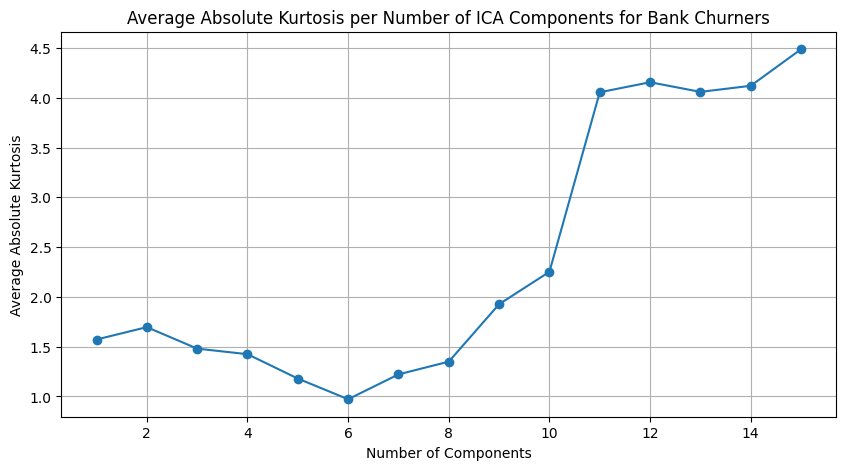

In [19]:
from algorithms import evaluate_kurtosis
import matplotlib.pyplot as plt

n_components_range = range(1, len(X_train_scaled[0]))
kurtosis_scores = evaluate_kurtosis(X_train_scaled, n_components_range)

print("kurtosis scores", kurtosis_scores)

plt.figure(figsize=(10, 5))
plt.plot(n_components_range, kurtosis_scores, marker='o')
plt.title(f'Average Absolute Kurtosis per Number of ICA Components for {dataset}')
plt.xlabel('Number of Components')
plt.ylabel('Average Absolute Kurtosis')
plt.grid(True)
plt.show()



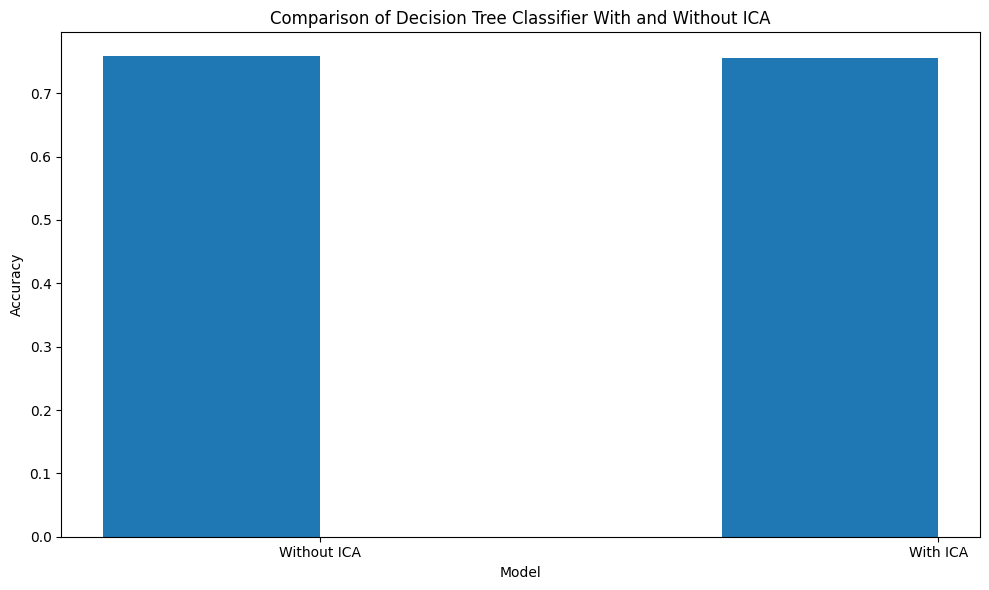

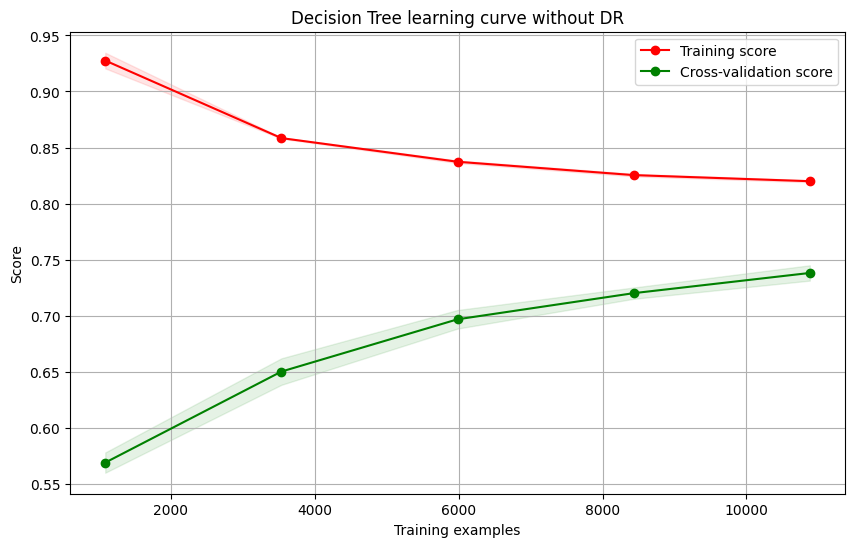

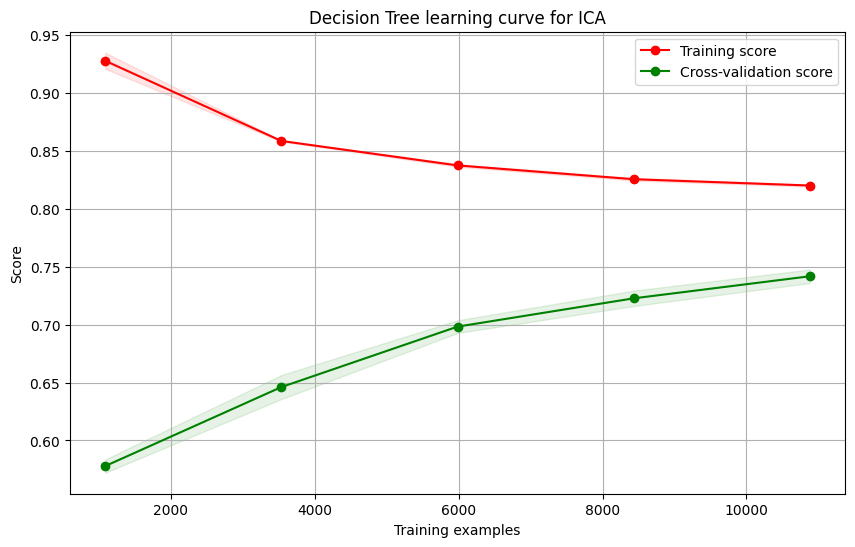

accuracies 0.7555882352941177


In [46]:

from sklearn.decomposition import FastICA
from dt_classifier import compare_dimensionality_reduction, compare_dimensionality_reduction_lc


n_components= 11

ica = FastICA(n_components=n_components, random_state=26)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)
acc_without_dr, acc_with_dr = compare_dimensionality_reduction(X_train_scaled, X_test_scaled, y_train, y_test, X_train_ica, X_test_ica, "ICA")
compare_dimensionality_reduction_lc(X_train_scaled, X_test_scaled, y_train, y_test, X_train_ica, X_test_ica, "ICA")

print('accuracies', acc_with_dr)


### Algorithm 5: Randomized Projection

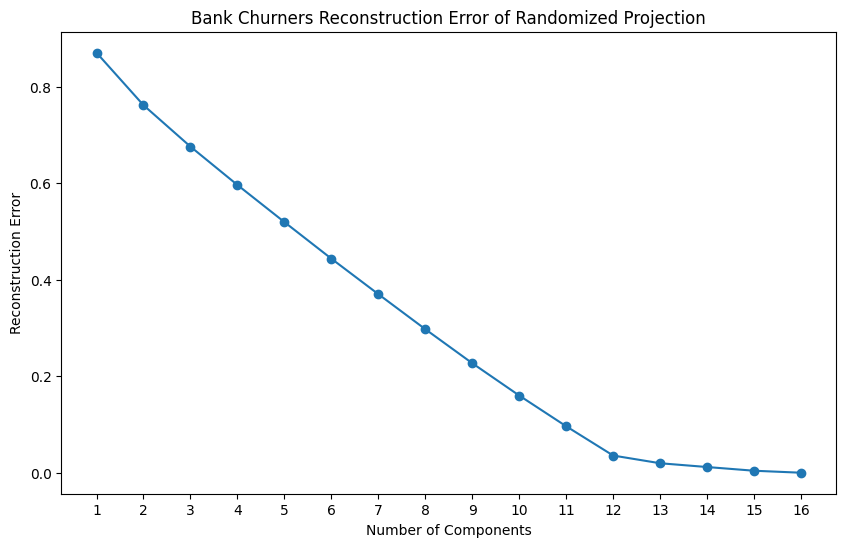

In [22]:
# # Plot the reconstruction errors
import matplotlib.pyplot as plt

from algorithms import calculate_reconstruction_error
errors = []
components = list(range(1, X_train_scaled.shape[1] + 1))  # Assuming maximum components equal to number of features
for n in components:
    error = calculate_reconstruction_error(X_train_scaled, n)
    errors.append(error)

# Plotting the reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(components, errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title(f'{dataset} Reconstruction Error of Randomized Projection')
plt.xticks(components)
plt.show()


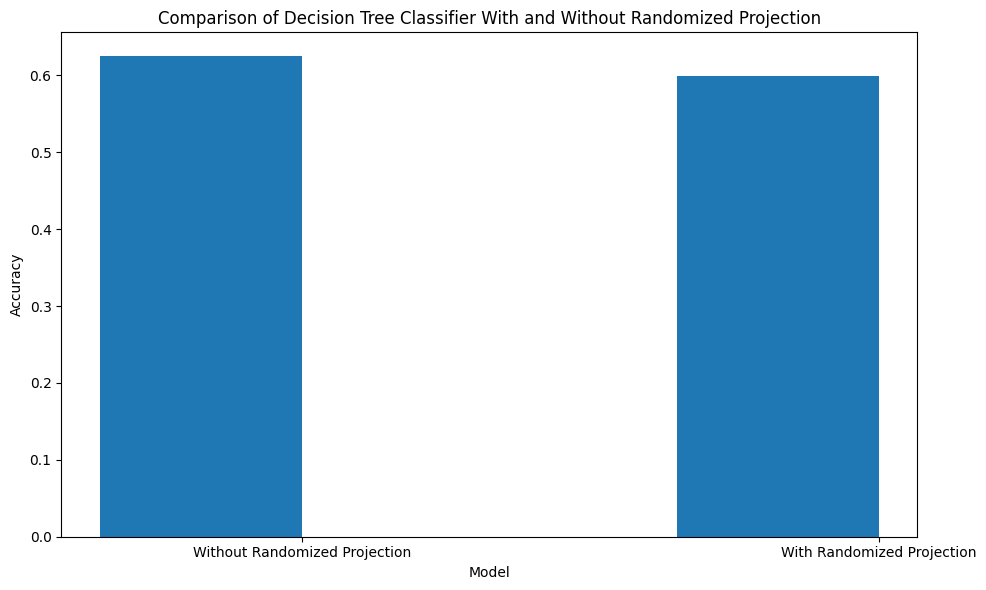

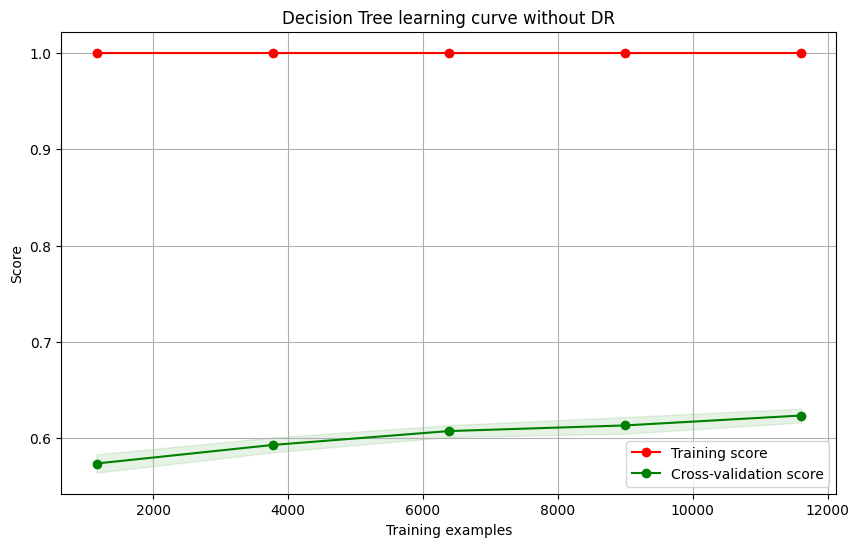

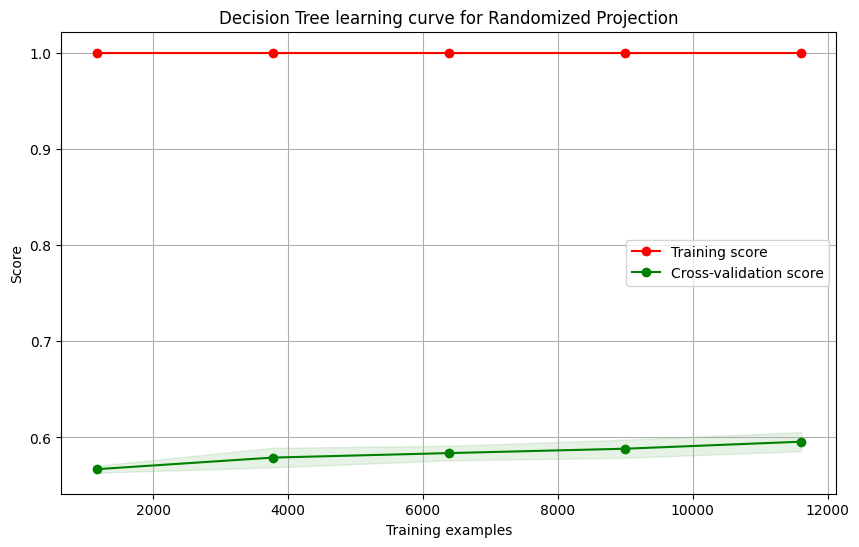

accuracies 0.5988420181968569


In [44]:
from sklearn.random_projection import GaussianRandomProjection
from dt_classifier import compare_dimensionality_reduction, compare_dimensionality_reduction_lc

# Apply Randomized Projection
rp = GaussianRandomProjection(n_components=17, random_state=26)
X_train_rp = rp.fit_transform(X_train_scaled)
X_test_rp = rp.transform(X_test_scaled)
acc_without_dr, acc_with_dr = compare_dimensionality_reduction(X_train_scaled, X_test_scaled, y_train, y_test, X_train_rp, X_test_rp, "Randomized Projection")
compare_dimensionality_reduction_lc(X_train_scaled, X_test_scaled, y_train, y_test, X_train_rp, X_test_rp, "Randomized Projection")

print('accuracies', acc_with_dr)

### Algorithm 6: Isomap (Manifold)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 2, Reconstruction Error: 21.039942788613384


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 3, Reconstruction Error: 16.269285179692535


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 4, Reconstruction Error: 14.544083631307151


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 5, Reconstruction Error: 13.77426346525904


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 6, Reconstruction Error: 13.235484504566683


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 7, Reconstruction Error: 12.71550023912268


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 8, Reconstruction Error: 12.275794208785925


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 9, Reconstruction Error: 11.99084131893009


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 10, Reconstruction Error: 11.76555732615567


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 11, Reconstruction Error: 11.55541331903539


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 12, Reconstruction Error: 11.375707196539125


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 13, Reconstruction Error: 11.226505999353837


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 14, Reconstruction Error: 11.101463830701368


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 15, Reconstruction Error: 10.987336160530818


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 16, Reconstruction Error: 10.904776942989372


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 17, Reconstruction Error: 10.83826379444869


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 18, Reconstruction Error: 10.787448535590437


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 19, Reconstruction Error: 10.75212762786281


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 20, Reconstruction Error: 10.728649914285542


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 21, Reconstruction Error: 10.713767945794853


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 22, Reconstruction Error: 10.703166670633149


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

Number of components: 23, Reconstruction Error: 10.6954468455494
Best number of components based on the lowest reconstruction error: 23


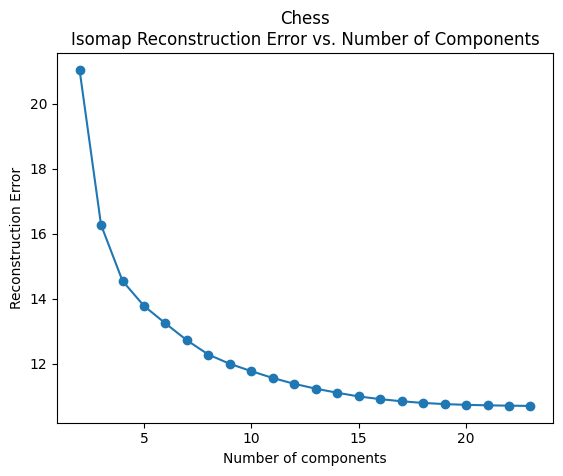

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Assume get_bank_dataset is a function that returns your dataset
# X_train, X_test, y_train, y_test = get_bank_dataset()

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Now, let's sample about half of the scaled training data
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.5, random_state=42, stratify=y_train
)

# Set the range of components to test
n_components_range = range(2, X_train_sampled.shape[1] + 1)
reconstruction_errors = []

# Prepare variables to store the best configuration
best_n_components = None
lowest_error = float('inf')

# Loop through each number of components to test with Isomap
for n_components in n_components_range:
    # Create and fit the Isomap model on the sampled data
    isomap = Isomap(n_components=n_components)
    X_train_isomap = isomap.fit_transform(X_train_sampled)
    reconstruction_error = isomap.reconstruction_error()
    reconstruction_errors.append(reconstruction_error)
    
    # Store the best number of components if the current reconstruction error is lower
    if reconstruction_error < lowest_error:
        best_n_components = n_components
        lowest_error = reconstruction_error
    
    # Output the results
    print(f'Number of components: {n_components}, Reconstruction Error: {reconstruction_error}')

# Print the best number of components
print(f'Best number of components based on the lowest reconstruction error: {best_n_components}')

# Plot the reconstruction errors
plt.plot(n_components_range, reconstruction_errors, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title(f'{dataset}\nIsomap Reconstruction Error vs. Number of Components')
plt.show()


#### Run the Isomap with n-Components

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 24 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

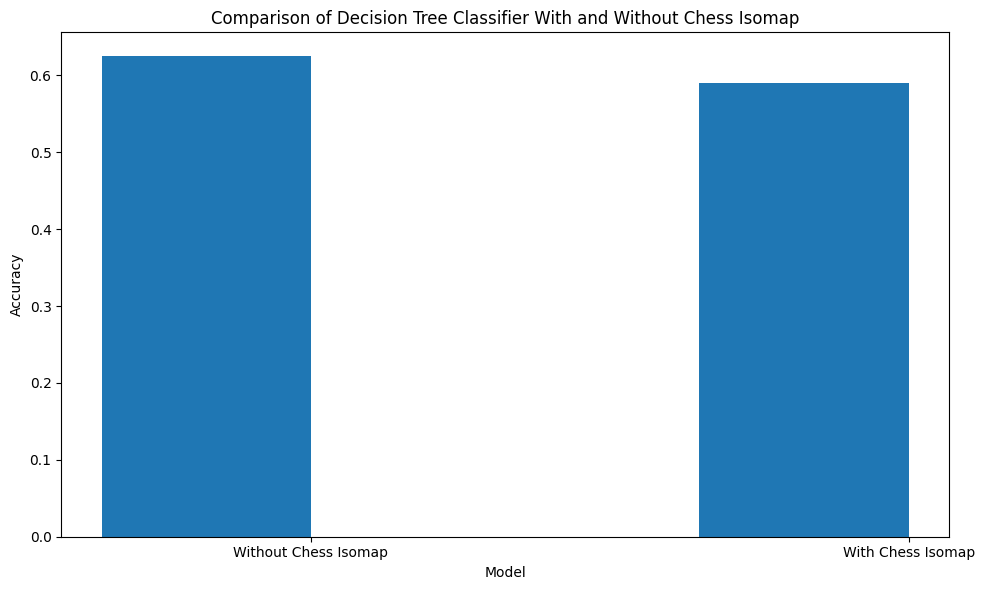

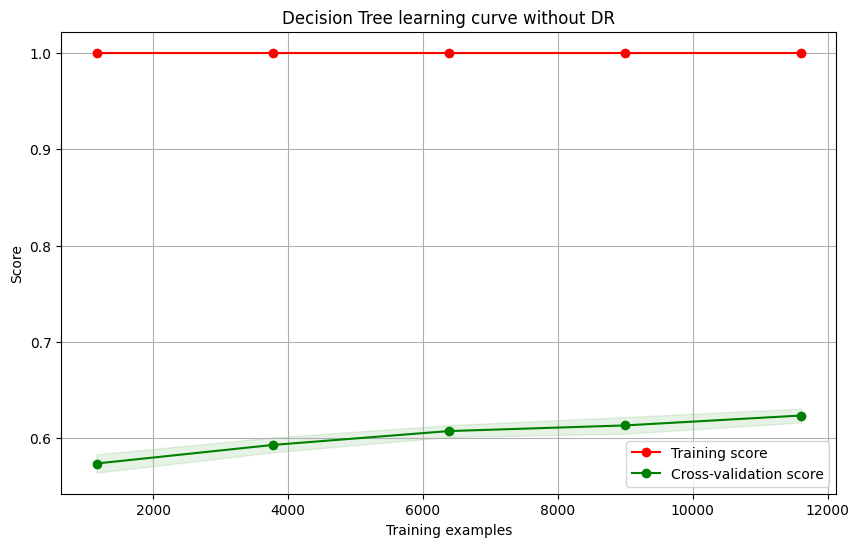

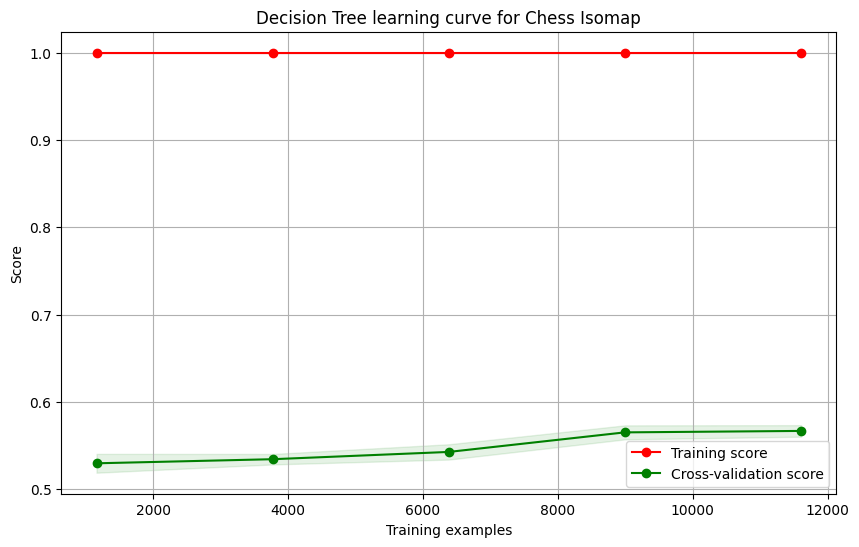

accuracies 0.6247587537910119 0.5894678797904604


In [36]:
from sklearn.manifold import Isomap

# Set the number of components to the chosen optimal number
n_components_optimal = 5

# Create and fit the Isomap model using the optimal number of components
isomap = Isomap(n_components=n_components_optimal)
X_train_isomap = isomap.fit_transform(X_train_scaled)
X_test_isomap = isomap.transform(X_test_scaled)

# X_train_isomap now contains the reduced dimensionality data
acc_without_dr, acc_with_dr = compare_dimensionality_reduction(X_train_scaled, X_test_scaled, y_train, y_test, X_train_isomap, X_test_isomap, f"{dataset} Isomap")
compare_dimensionality_reduction_lc(X_train_scaled, X_test_scaled, y_train, y_test, X_train_isomap, X_test_isomap, f"{dataset} Isomap")

print('accuracies', acc_without_dr, acc_with_dr)





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


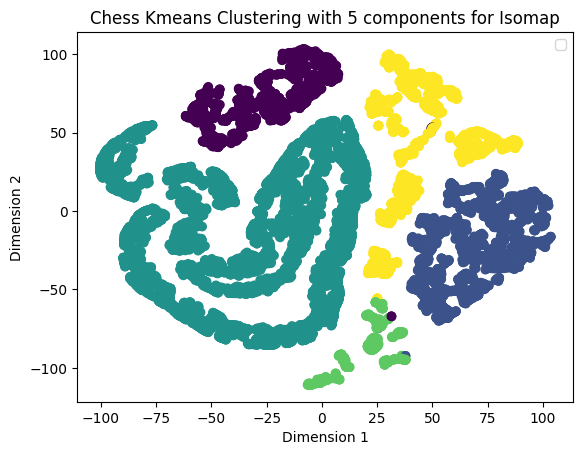

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


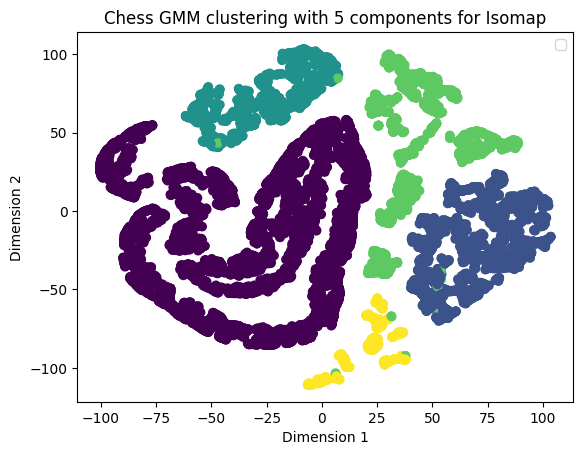

In [38]:
#temp run code in the clustering
from algorithms import run_gmm, plot_clustering, run_kmeans
isomap_components = 5

gmm_isomap, gmm_labels_isomap = run_gmm(X_train_isomap, isomap_components)
kmeans_isomap, kmeans_labels_isomap = run_kmeans(X_train_isomap, isomap_components)
plot_clustering(X_train_isomap, kmeans_labels_isomap, title=f"{dataset} Kmeans Clustering with {isomap_components} components for Isomap", tsne_components=2)
plot_clustering(X_train_isomap, gmm_labels_isomap, title=f"{dataset} GMM clustering with {isomap_components} components for Isomap", tsne_components=2)



### Plotting learning curves 

In [ ]:
# probably scrap - remove out.
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# Assume X_pca, X_ica, X_rp are the datasets reduced by PCA, ICA, and RP respectively
# and y is the target variable

train_sizes, train_scores, validation_scores = learning_curve(
    DecisionTreeClassifier(),
    X_train_pca, y, # Change this to X_ica and X_rp for other curves
    train_sizes=[50, 100, 250, 500, 750, 1000], # Example sizes
    cv=5,
    scoring='accuracy'
)

# Plotting the learning curves
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation score')
plt.title('Learning Curve for Decision Tree with PCA')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Using Dim Reduction with Clustering
To run this, you only need to run the dataset of choise from part 1, then set the n_components as they should from exploration in Part 3 (dim reduction)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


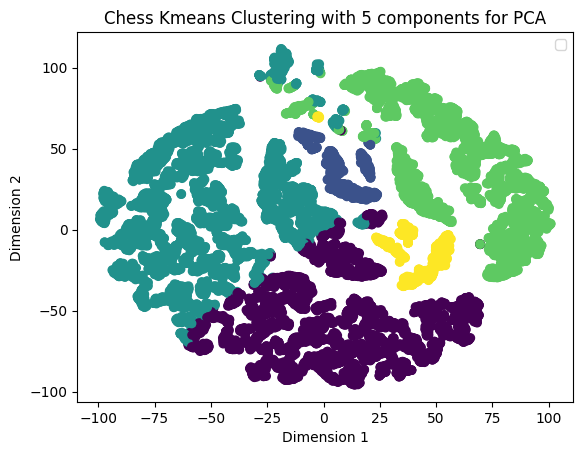

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


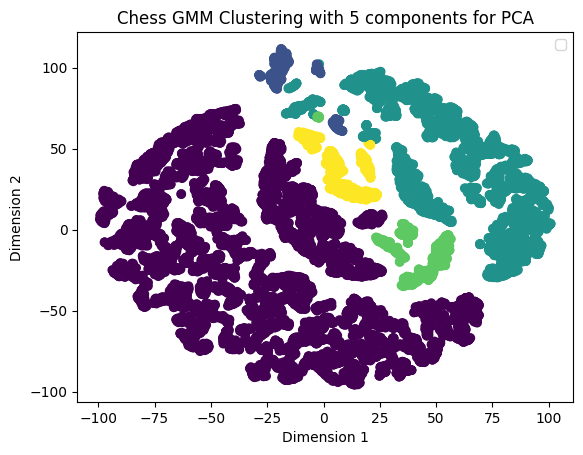

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


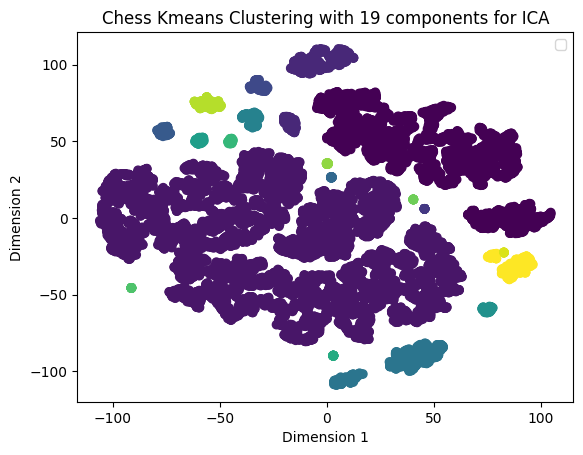

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


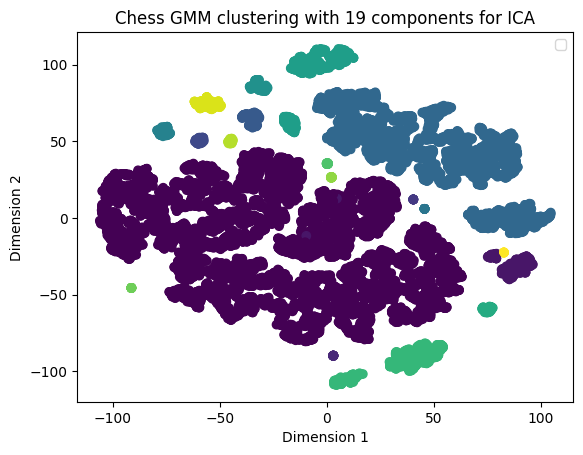

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


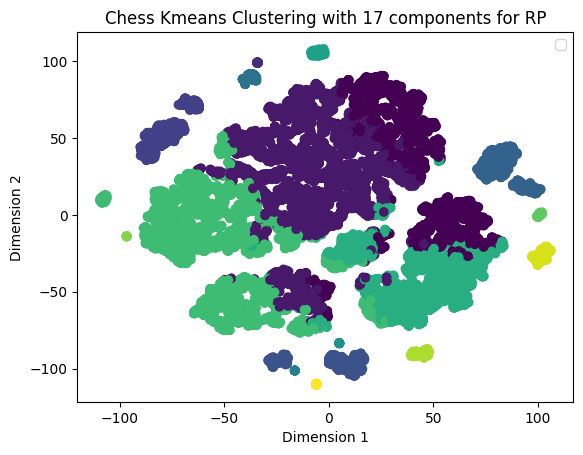

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


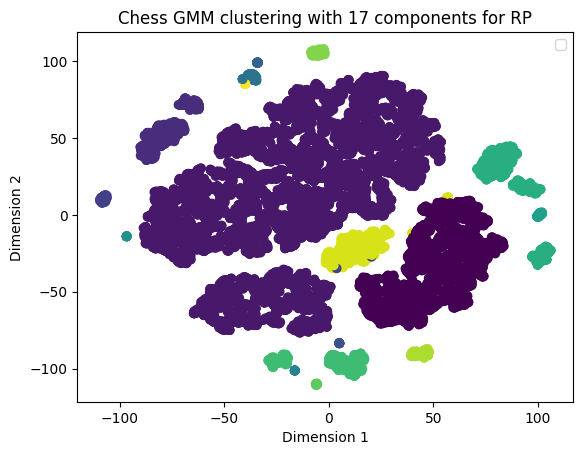

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


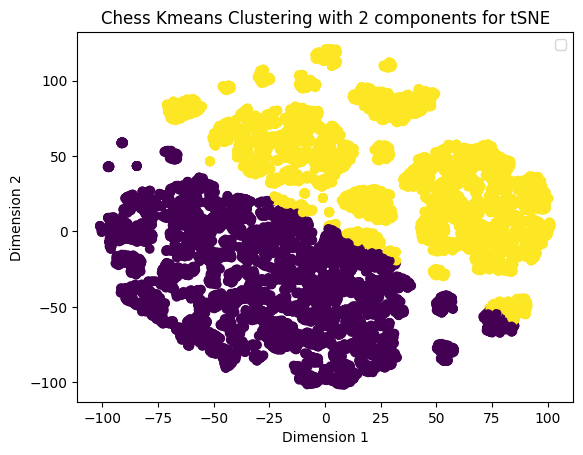

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


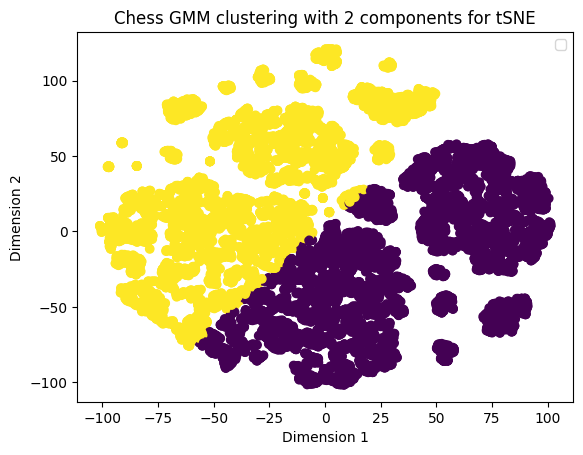

In [7]:
from sklearn.manifold import TSNE
import numpy as np
from algorithms import run_gmm, plot_clustering, run_kmeans
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

# set the n_components chosen to run based on the exploration using unsupervised techniques.
pca_components = 5
ica_components = 19
rp_components = 17
isomap_components = 10

pca = PCA(n_components=pca_components, random_state=26)
X_train_pca = pca.fit_transform(X_train_scaled)
gmm_pca, gmm_labels = run_gmm(X_train_pca, pca_components)
kmeans_pca, kmeans_labels_pca = run_kmeans(X_train_pca, pca_components)
plot_clustering(X_train_pca, kmeans_labels_pca, title=f"{dataset} Kmeans Clustering with {pca_components} components for PCA", tsne_components=2)
plot_clustering(X_train_pca, gmm_labels, title=f"{dataset} GMM Clustering with {pca_components} components for PCA", tsne_components=2)

ica = FastICA(n_components=ica_components, random_state=26)
X_train_ica = ica.fit_transform(X_train_scaled)
gmm_ica, gmm_labels_ica = run_gmm(X_train_ica, ica_components)
kmeans_ica, kmeans_labels_ica = run_kmeans(X_train_ica, ica_components)
plot_clustering(X_train_ica, kmeans_labels_ica, title=f"{dataset} Kmeans Clustering with {ica_components} components for ICA", tsne_components=2)
plot_clustering(X_train_ica, gmm_labels_ica, title=f"{dataset} GMM clustering with {ica_components} components for ICA", tsne_components=2)

rp = GaussianRandomProjection(n_components=11, random_state=26)
X_train_rp = rp.fit_transform(X_train_scaled)
gmm_rp, gmm_labels_rp = run_gmm(X_train_rp, rp_components)
kmeans_rp, kmeans_labels_rp = run_kmeans(X_train_rp, rp_components)
plot_clustering(X_train_rp, kmeans_labels_rp, title=f"{dataset} Kmeans Clustering with {rp_components} components for RP", tsne_components=2)
plot_clustering(X_train_rp, gmm_labels_rp, title=f"{dataset} GMM clustering with {rp_components} components for RP", tsne_components=2)

# ---
n_components_optimal = 10

# Create and fit the Isomap model using the optimal number of components
isomap = Isomap(n_components=n_components_optimal)
X_train_isomap = isomap.fit_transform(X_train_scaled)
X_test_isomap = isomap.transform(X_test_scaled)

# X_train_isomap now contains the reduced dimensionality data
acc_without_dr, acc_with_dr = compare_dimensionality_reduction(X_train_scaled, X_test_scaled, y_train, y_test, X_train_isomap, X_test_isomap, f"{dataset} Isomap")
compare_dimensionality_reduction_lc(X_train_scaled, X_test_scaled, y_train, y_test, X_train_isomap, X_test_isomap, f"{dataset} Isomap")

print('accuracies', acc_without_dr, acc_with_dr)





# rp = GaussianRandomProjection(n_components=10, random_state=26)
# X_train_rp = rp.fit_transform(X_train_scaled)
from algorithms import run_gmm, plot_clustering, run_kmeans

gmm_isomap, gmm_labels_isomap = run_gmm(X_train_isomap, isomap_components)
kmeans_isomap, kmeans_labels_isomap = run_kmeans(X_train_isomap, isomap_components)
plot_clustering(X_train_isomap, kmeans_labels_isomap, title=f"{dataset} Kmeans Clustering with {isomap_components} components for Isomap", tsne_components=2)
plot_clustering(X_train_isomap, gmm_labels_isomap, title=f"{dataset} GMM clustering with {isomap_components} components for Isomap", tsne_components=2)






## Neural Networks

Best Hyperparameters: {}

NN train report
               precision    recall  f1-score   support

           0   0.545212  0.528904  0.536934      6954
           1   0.577781  0.593696  0.585630      7551

    accuracy                       0.562634     14505
   macro avg   0.561496  0.561300  0.561282     14505
weighted avg   0.562167  0.562634  0.562284     14505


NN test report
               precision    recall  f1-score   support

           0   0.526384  0.468134  0.495554      1726
           1   0.561185  0.617570  0.588029      1901

    accuracy                       0.546457      3627
   macro avg   0.543785  0.542852  0.541791      3627
weighted avg   0.544624  0.546457  0.544022      3627

NN took 0.0050427913665771484 seconds to execute.


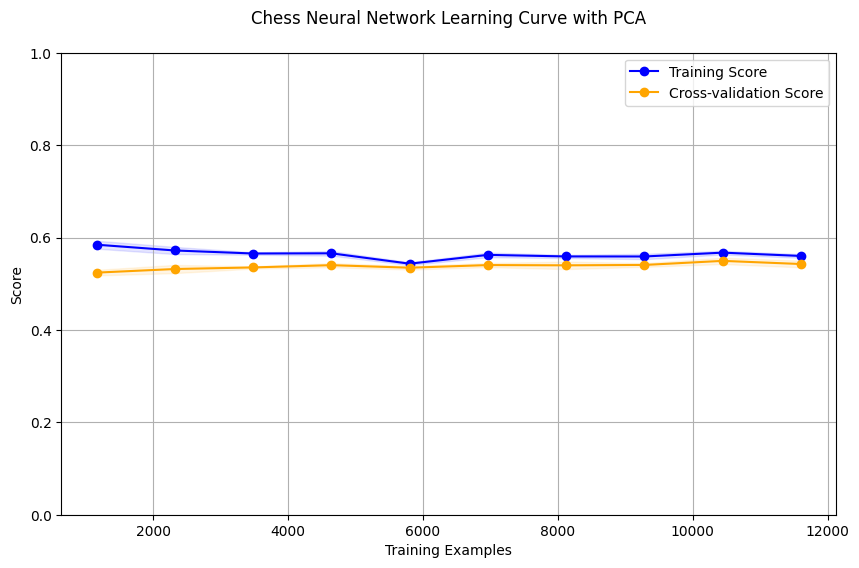

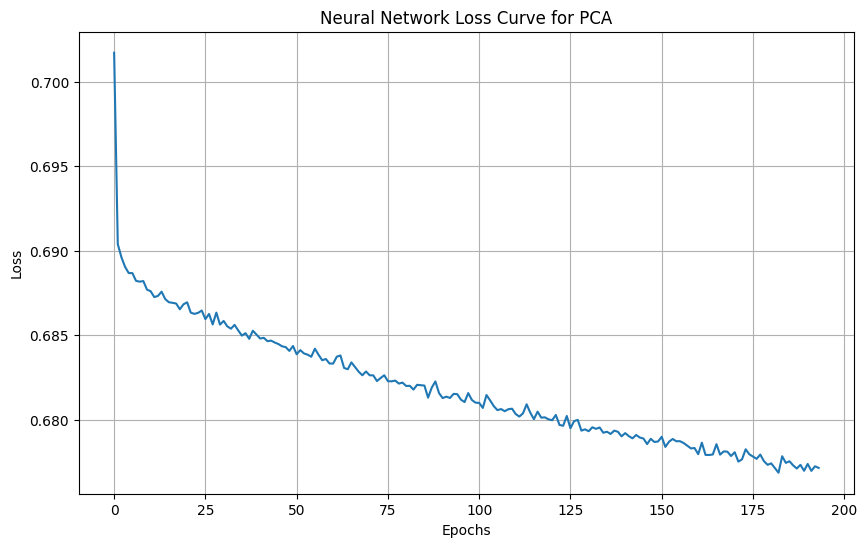

In [49]:
from umap import UMAP
from graphs import plot_learning_curve, plot_loss_curve
from nn import nn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


# Assuming X_train_scaled, X_test_scaled are already scaled versions of your training and test sets
# and y_train, y_test are the labels

# Set PCA components
pca_components = 5  # or however many you want

# Initialize PCA
pca = PCA(n_components=pca_components, random_state=26)

# Apply PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply PCA on the test data (only transform, don't fit)
X_test_pca = pca.transform(X_test_scaled)

# If you want to use clustering results as part of the input
gmm = GaussianMixture(n_components=pca_components, random_state=26)
kmeans = KMeans(n_clusters=pca_components, random_state=26)

# Fit GMM and KMeans on the PCA-transformed training data
gmm_pca = gmm.fit(X_train_pca)
kmeans_pca = kmeans.fit(X_train_pca)

# Predict clusters for the training data
gmm_labels = gmm.predict(X_train_pca)
kmeans_labels_pca = kmeans.predict(X_train_pca)

# You could append these labels to your PCA features if you think it'll help the NN training
# X_train_pca = np.concatenate((X_train_pca, gmm_labels.reshape(-1, 1)), axis=1)

# Initialize and train your neural network
param_grid = {}  # Define your parameter grid here
best_nn_model_pca, best_nn_params_pca = nn(X_train_pca, X_test_pca, y_train, y_test, param_grid)
# gmm_isomap, gmm_labels_isomap = run_gmm(X_train_isomap, isomap_components)
# kmeans_isomap, kmeans_labels_isomap = run_kmeans(X_train_isomap, isomap_components)
# best_nn_model_isomap, best_nn_params_isomap = nn(X_train_isomap, X_test_isomap, y_train, y_test, param_grid)

# Now your NN is trained on PCA-transformed data.

plot_learning_curve(best_nn_model_pca, X_train_pca, y_train, scoring='accuracy', title=f"Chess Neural Network Learning Curve with PCA\n")
plot_loss_curve(best_nn_model_pca, "PCA")
# plot_learning_curve(best_nn_model_isomap, X_train_pca, y_train, scoring='accuracy', title=f"Chess Neural Network Learning Curve with Isomap\n")
# plot_loss_curve(best_nn_model_isomap, "Isomap")


## Using labelled features from clustering in NN

### Running with Kmeans Labels

Number of entries: 18132
Number of features: 6
   turns  white_rating  black_rating  rated winner  first_move_Nc3  \
1     16          1322          1261   True  black           False   
2     61          1496          1500   True  white           False   
3     61          1439          1454   True  white           False   
4     95          1523          1469   True  white           False   
6     33          1520          1423   True  white           False   
8     66          1439          1392   True  black           False   
9    119          1381          1209   True  white           False   

   first_move_Nf3  first_move_Nh3  first_move_a3  first_move_a4  ...  \
1           False           False          False          False  ...   
2           False           False          False          False  ...   
3           False           False          False          False  ...   
4           False           False          False          False  ...   
6           False           Fals

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

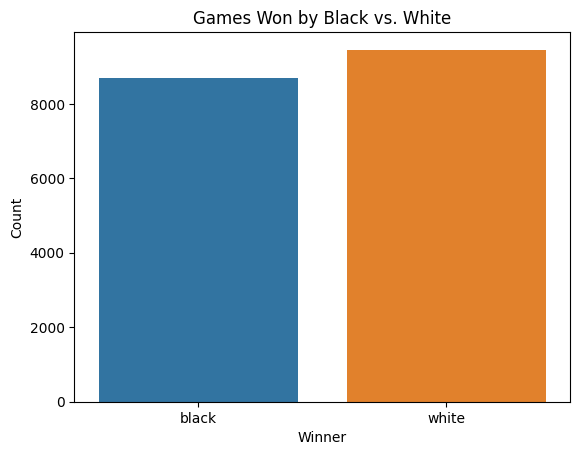

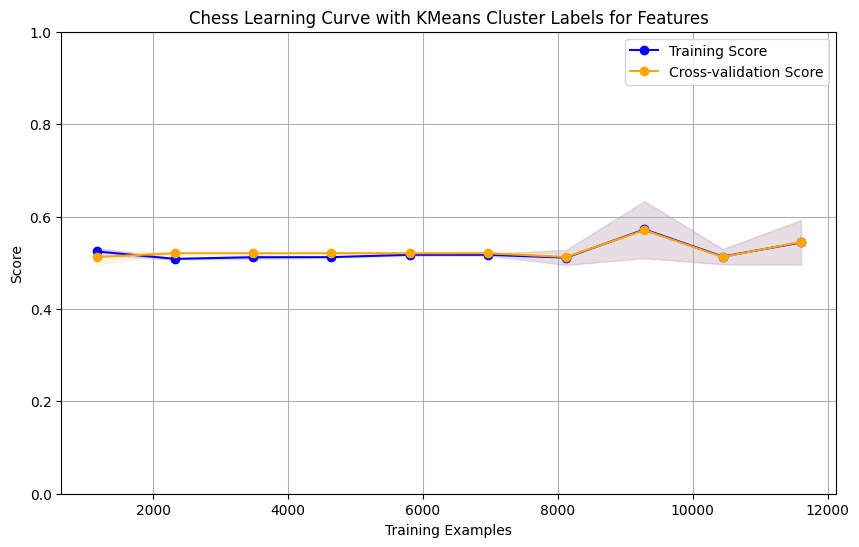

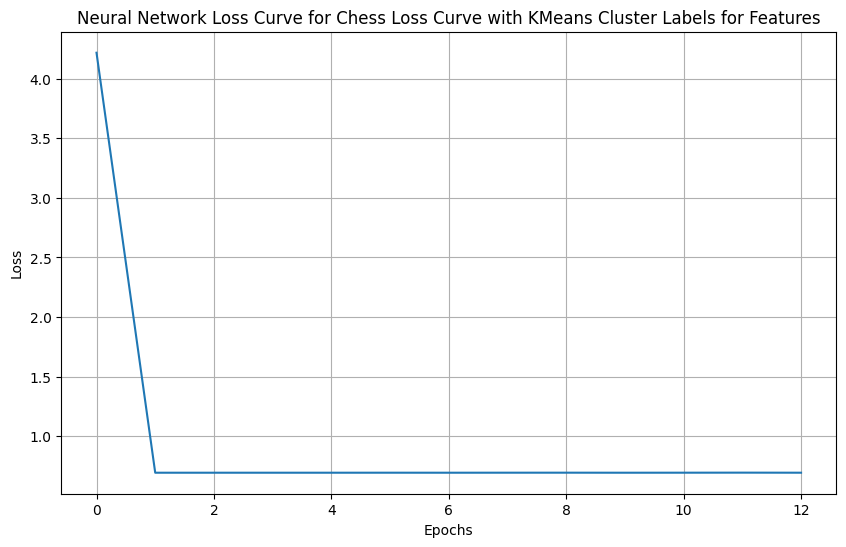

In [51]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from data import get_chess_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Constants
np.random.seed(26)
param_grid = {
    'hidden_layer_sizes': [(64,)],
    'learning_rate_init': [0.1],
}

# Run chess data loading
X_train, X_test, y_train, y_test = get_chess_data()

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform K-Means clustering on the scaled training data
kmeans = KMeans(n_clusters=6, random_state=26)  # choose the appropriate number of clusters
kmeans.fit(X_train_scaled)

# Predict cluster labels for the training and test sets
train_cluster_labels = kmeans.predict(X_train_scaled)
test_cluster_labels = kmeans.predict(X_test_scaled)

# Add cluster labels to the training and test data
X_train['cluster_label'] = train_cluster_labels
X_test['cluster_label'] = test_cluster_labels

# Now proceed with your model training and evaluation using X_train and X_test
best_nn_model, best_nn_params = nn(X_train, X_test, y_train, y_test, param_grid)
plot_learning_curve(best_nn_model, X_train, y_train, scoring='accuracy', title=f"Chess Learning Curve with KMeans Cluster Labels for Features")
plot_loss_curve(best_nn_model, f"Chess Loss Curve with KMeans Cluster Labels for Features")


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from data import get_chess_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Constants
np.random.seed(26)
param_grid = {
    'hidden_layer_sizes': [(64,)],
    'learning_rate_init': [0.1],
}

# Run chess data loading
X_train, X_test, y_train, y_test = get_chess_data()

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Expectation Maximization clustering (Gaussian Mixture Model) on the scaled training data
gmm = GaussianMixture(n_components=6, random_state=26)  # choose the appropriate number of clusters
gmm.fit(X_train_scaled)

# Predict cluster labels for the training and test sets
train_cluster_labels = gmm.predict(X_train_scaled)
test_cluster_labels = gmm.predict(X_test_scaled)

# Add cluster labels to the training and test data
X_train['cluster_label'] = train_cluster_labels
X_test['cluster_label'] = test_cluster_labels

# Now proceed with your model training and evaluation using X_train and X_test
best_nn_model, best_nn_params = nn(X_train, X_test, y_train, y_test, param_grid)
plot_learning_curve(best_nn_model, X_train, y_train, scoring='accuracy', title=f"Chess Learning Curve with GMM Cluster Labels for Features")
plot_loss_curve(best_nn_model, f"Chess Loss Curve with GMM Cluster Labels for Features")


Best Hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (512,), 'learning_rate_init': 0.01}

NN train report
               precision    recall  f1-score   support

           0   0.655156  0.602962  0.627977      6954
           1   0.659346  0.707721  0.682678      7551

    accuracy                       0.657497     14505
   macro avg   0.657251  0.655342  0.655327     14505
weighted avg   0.657337  0.657497  0.656453     14505


NN test report
               precision    recall  f1-score   support

           0   0.660315  0.582271  0.618842      1726
           1   0.657482  0.728038  0.690964      1901

    accuracy                       0.658671      3627
   macro avg   0.658899  0.655155  0.654903      3627
weighted avg   0.658830  0.658671  0.656643      3627

NN took 0.010426044464111328 seconds to execute.


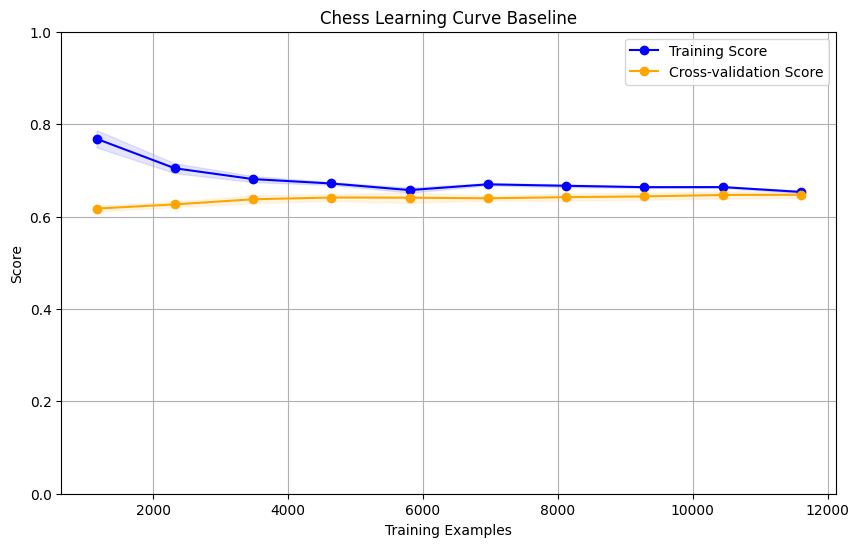

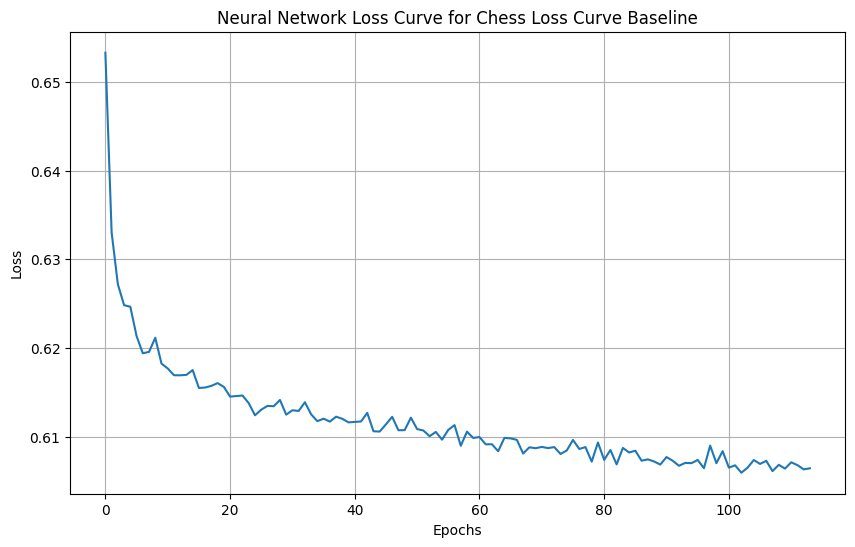

In [48]:
param_grid = {
    'hidden_layer_sizes': [(512,)],
    'learning_rate_init': [0.01],
    'alpha': [0.001], # L2 penalty (regularization term) parameter
}

best_nn_model, best_nn_params = nn(X_train_scaled, X_test_scaled, y_train, y_test, param_grid)
plot_learning_curve(best_nn_model, X_train_scaled, y_train, scoring='accuracy', title=f"Chess Learning Curve Baseline")
plot_loss_curve(best_nn_model, f"Chess Loss Curve Baseline")

### Running with EM

Number of entries: 18132
Number of features: 6
   turns  white_rating  black_rating  rated winner  first_move_Nc3  \
1     16          1322          1261   True  black           False   
2     61          1496          1500   True  white           False   
3     61          1439          1454   True  white           False   
4     95          1523          1469   True  white           False   
6     33          1520          1423   True  white           False   
8     66          1439          1392   True  black           False   
9    119          1381          1209   True  white           False   

   first_move_Nf3  first_move_Nh3  first_move_a3  first_move_a4  ...  \
1           False           False          False          False  ...   
2           False           False          False          False  ...   
3           False           False          False          False  ...   
4           False           False          False          False  ...   
6           False           Fals

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

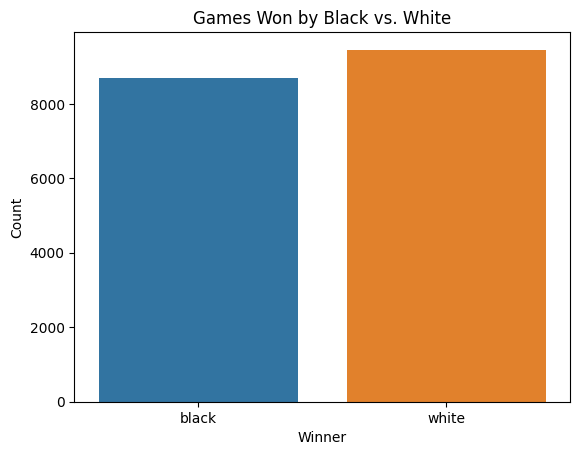

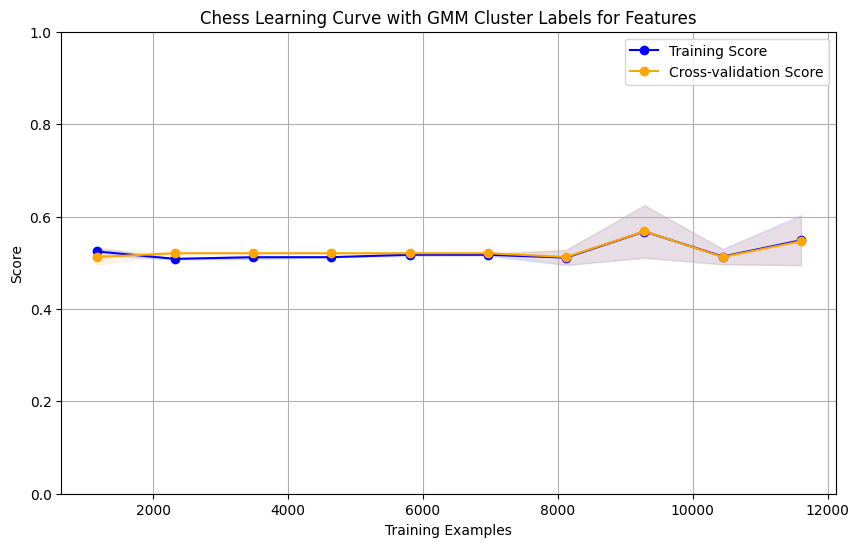

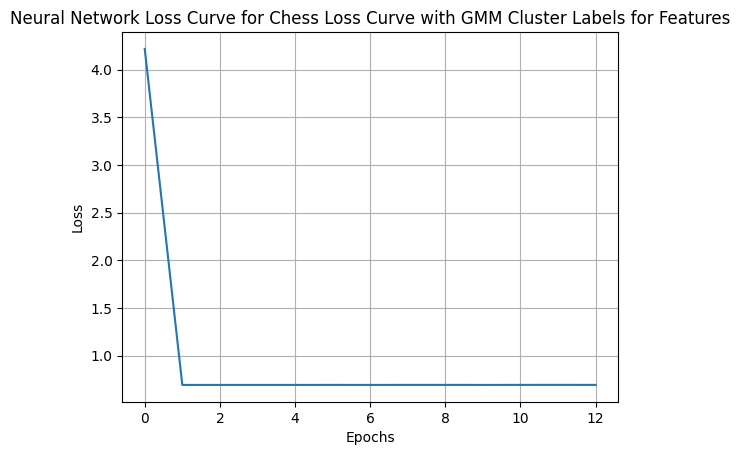

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from data import get_chess_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Constants
np.random.seed(26)

# Run chess data loading
X_train, X_test, y_train, y_test = get_chess_data()

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform GMM clustering on the scaled training data
gmm = GaussianMixture(n_components=5, random_state=26)  # choose the appropriate number of clusters
gmm.fit(X_train_scaled)

# Predict cluster labels for the training and test sets
train_cluster_labels = gmm.predict(X_train_scaled)
test_cluster_labels = gmm.predict(X_test_scaled)

# Add cluster labels to the training and test data
X_train['cluster_label'] = train_cluster_labels
X_test['cluster_label'] = test_cluster_labels

# Now proceed with your model training and evaluation using X_train and X_test
best_nn_model, best_nn_params = nn(X_train, X_test, y_train, y_test, param_grid)
plot_learning_curve(best_nn_model, X_train, y_train, scoring='accuracy', title=f"Chess Learning Curve with GMM Cluster Labels for Features")
plot_loss_curve(best_nn_model, f"Chess Loss Curve with GMM Cluster Labels for Features")